In [1]:
import pandas as pd
T=pd.read_csv(r'C:\Users\julia\Documents\python36\datasource\data\the.csv')
T.head()

,tout_moment,variete,comment,sucre,forme,type,sexe,CSP,sportif,age,frequence,plus_pour_la_sante
0,0,noir,pur,1,sachet,inconnu,H,cadre moyen,1,39,1/jour,1
1,0,noir,lait,0,sachet,variable,F,cadre moyen,1,45,1/jour,1
2,0,parfumé,pur,0,sachet,variable,F,autre actif,1,47,+ de 2/jour,1
3,0,parfumé,pur,1,sachet,variable,H,étudiant,0,23,1/jour,1
4,1,parfumé,pur,0,sachet,variable,H,employé,1,48,+ de 2/jour,0


In [2]:
T2=T.query('age <= 25 or sportif == 1')

In [3]:
T1=T.query('sexe == "F" and age >= 30')

In [4]:
E=pd.crosstab(T['sexe'],T['comment'])

In [5]:
E

comment,autre,citron,lait,pur
sexe,,,,
F,6,19,32,121
H,3,14,31,74


In [6]:
E.T

sexe,F,H
comment,,
autre,6,3
citron,19,14
lait,32,31
pur,121,74


In [7]:
M=pd.crosstab(T['sexe'],T['comment'], margins=True)

In [8]:
M

comment,autre,citron,lait,pur,All
sexe,,,,,
F,6,19,32,121,178
H,3,14,31,74,122
All,9,33,63,195,300


In [9]:
Freq=M['lait']/M['All']

In [10]:
Freq

sexe
F      0.179775
H      0.254098
All    0.210000
dtype: float64

In [11]:
import pylab as pl

In [12]:
E2=pd.crosstab(T['comment'],T['sexe'])
E2

sexe,F,H
comment,,
autre,6,3
citron,19,14
lait,32,31
pur,121,74


([<matplotlib.patches.Wedge at 0x1ff12198dc0>,
 [Text(1.0938380378228276, 0.11626842654782321, 'autre'),
  Text(0.9394224943620061, 0.5722633808716638, 'citron'),
  Text(0.13555491853488866, 1.091615712630136, 'lait'),
  Text(-0.5887536068655574, -0.9291766195954334, 'pur')],
 [Text(0.5966389297215423, 0.06341914175335811, '3%'),
  Text(0.5124122696520033, 0.3121436622936348, '10%'),
  Text(0.07393904647357562, 0.5954267523437106, '17%'),
  Text(-0.3211383310175767, -0.5068236106884182, '67%')])

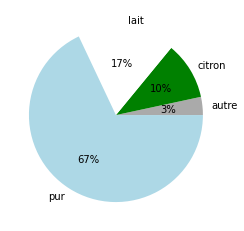

In [13]:
pl.pie(E2['F'],
       autopct = lambda x : str(int(x)) + '%',
       colors = ['#AAA', 'green', 'white', 'lightblue'],
       labels = E.T.index)

array([[<AxesSubplot:ylabel='autre'>, <AxesSubplot:ylabel='citron'>,
        <AxesSubplot:ylabel='lait'>, <AxesSubplot:ylabel='pur'>]],
      dtype=object)

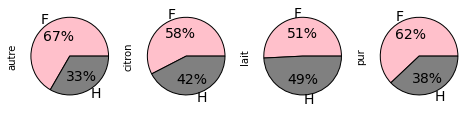

In [14]:
E.plot.pie(subplots = True,
           legend = None,
           layout = (1,4),
           autopct = lambda x : str(round(x)) + '%',
           figsize = (8,3),
           colors = ['pink', 'gray'],
           wedgeprops = {'edgecolor' : 'black'},
           fontsize = 14
          )

array([[<AxesSubplot:ylabel='F'>, <AxesSubplot:ylabel='H'>]], dtype=object)

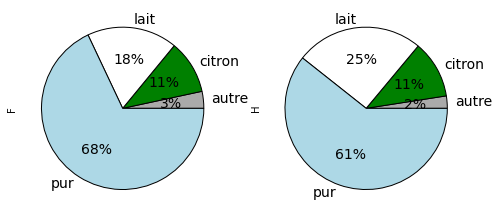

In [15]:
E.T.plot.pie(subplots = True,
             legend = None,
             layout = (1,2),
             autopct = lambda x : str(round(x)) + '%',
             figsize = (8,4),
             colors = ['#AAA', 'green', 'white', 'lightblue'],
             wedgeprops = {'edgecolor' : 'black'},
             fontsize = 14
            )

In [16]:
T.groupby('sexe').sum()

,tout_moment,sucre,sportif,age,plus_pour_la_sante
sexe,,,,,
F,63,71,97,6649,127
H,40,74,82,4467,83


In [17]:
T.groupby('sexe').mean()

,tout_moment,sucre,sportif,age,plus_pour_la_sante
sexe,,,,,
F,0.353933,0.398876,0.544944,37.353933,0.713483
H,0.327869,0.606557,0.672131,36.614754,0.680328


In [18]:
T.groupby(['sexe','sucre']).mean()

tout_moment   sportif        age  plus_pour_la_sante
sexe sucre                                                      
F    0         0.336449  0.551402  40.757009            0.757009
     1         0.380282  0.535211  32.225352            0.647887
H    0         0.312500  0.645833  41.145833            0.687500
     1         0.337838  0.689189  33.675676            0.675676